# Loading Liberaries

In [44]:
import os
import pandas as pd
import numpy as np

In [334]:
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split, cross_val_score, KFold

from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pre-Processing Dataset

### Question#1: You have to implement K-NN algorithm on the above-mentioned dataset with the following steps:

* Data preprocessing: In the dataset, the total number of samples in each file are more
  than 100,000 and any block of 1000 samples can be used to label the corresponding
  healthy and unhealthy output. Create a new csv file for training and testing your
  model in which each row containing 1000 samples with assignment of the output
  label healthy/unhealthy.

In [6]:
parent_folder = 'C:/Users/Talha Sattar/Downloads/Current Signature Dataset of Three-Phase Induction Motor under Varying Load Conditions'

folders = [
    '3-Phase-current-0.7mm-bearing-fault',
    '3-Phase-current-0.9mm-bearing-fault',
    '3-Phase-current-1.1mm-bearing-fault',
    '3-Phase-current-1.3mm-bearing-fault',
    '3-Phase-current-1.5mm-bearing-fault',
    '3-Phase-current-1.7mm-bearing-fault',
    '3-Phase-current-12-4mm-broken-rotor-bar-fault',
    '3-Phase-current-healthy-motor'
]

structured_data = pd.DataFrame()

for label, folder in enumerate(folders):
    folder_path = os.path.join(parent_folder, folder)
    print(folder)
    for file in os.listdir(folder_path):
        print(file)
        file_path = os.path.join(folder_path, file)
        df = pd.read_csv(file_path, nrows=100000)  # Read only the first 100,000 rows
        df.dropna(inplace=True)  # Drop rows with null values
        label_name = ' '.join(file.split()[:8])  # Label based on the first 8 words of the file name
        
        # Reshape the data into 1000 columns of samples
        total_samples = len(df[' Current-A'])
        reshaped_data = df[' Current-A'][:total_samples - (total_samples % 1000)].values.reshape(-1, 1000)
        data = pd.DataFrame(reshaped_data)
        
        # Add a new column 'Label' with the label for each row
        data['Label'] = label_name
        structured_data = pd.concat([structured_data, data], ignore_index=True)

structured_data.to_csv('Pre_processed_Dataset2.csv', mode='w', index=False)


3-Phase-current-0.7mm-bearing-fault
0.7inner-100watt.csv
0.7inner-200watt.csv
0.7inner-300watt.csv
0.7outer-100watt.csv
0.7outer-200watt.csv
0.7outer-300watt.csv
3-Phase-current-0.9mm-bearing-fault
0.9inner-100watt.csv
0.9inner-200watt.csv
0.9inner-300watt.csv
0.9outer-100watt.csv
0.9outer-200watt.csv
0.9outer-300watt.csv
3-Phase-current-1.1mm-bearing-fault
1.1inner-100watt.csv
1.1inner-200watt.csv
1.1inner-300watt.csv
1.1outer-100watt.csv
1.1outer-200watt.csv
1.1outer-300watt.csv
3-Phase-current-1.3mm-bearing-fault
1.3inner-100watt.csv
1.3inner-200watt.csv
1.3inner-300watt.csv
1.3outer-100watt.csv
1.3outer-200watt.csv
1.3outer-300watt.csv
3-Phase-current-1.5mm-bearing-fault
1.5inner-100watt.csv
1.5inner-200watt.csv
1.5inner-300watt.csv
1.5outer-100watt.csv
1.5outer-200watt.csv
1.5outer-300watt.csv
3-Phase-current-1.7mm-bearing-fault
1.7inner-100watt.csv
1.7inner-200watt.csv
1.7inner-300watt.csv
1.7outer-100watt.csv
1.7outer-200watt.csv
1.7outer-300watt.csv
3-Phase-current-12-4mm-broke

In [12]:
processed_Data = pd.read_csv('Pre_processed_Dataset2.csv')

In [54]:
processed_Data

,0,1,2,3,4,5,6,7,8,9,...,991,992,993,994,995,996,997,998,999,Label
0,2.3309,2.3309,2.3309,2.3309,2.3309,2.3309,2.3309,2.3309,2.3309,2.3309,...,2.7228,2.7228,2.7228,2.7228,2.7228,2.7228,2.7228,2.7228,2.7228,0.7inner-100watt.csv
1,2.7228,2.7228,2.7228,2.7228,2.7228,2.7228,2.7228,2.7228,2.7228,2.7228,...,2.9524,2.9524,2.9524,2.9524,2.9524,2.9524,2.9524,2.9524,2.9524,0.7inner-100watt.csv
2,2.9524,2.9524,2.9524,2.9524,2.9524,2.9524,2.9524,2.9524,2.9524,2.9524,...,2.1111,2.1111,2.1111,2.1111,2.1111,2.1111,2.1111,2.1111,2.1111,0.7inner-100watt.csv
3,2.1111,2.1111,2.1111,2.1111,2.1111,2.1111,2.1111,2.1111,2.1111,2.1111,...,2.1282,2.1282,2.1282,2.1282,2.1282,2.1282,2.1282,2.1282,2.1282,0.7inner-100watt.csv
4,2.1282,2.1282,2.1282,2.1282,2.1282,2.1282,2.1282,2.1282,2.1282,2.1282,...,2.9805,2.9805,2.9805,2.9805,3.0024,3.0024,3.0024,3.0024,3.0024,0.7inner-100watt.csv
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3861,2.4603,2.4530,2.4530,2.4530,2.4530,2.4530,2.4530,2.4530,2.4530,2.4530,...,2.3712,2.3712,2.3712,2.3712,2.3712,2.3712,2.3712,2.3712,2.3712,healthy.csv
3862,2.3712,2.3712,2.3712,2.3712,2.3712,2.3712,2.3712,2.3712,2.3712,2.3712,...,2.3065,2.3065,2.3065,2.3065,2.3065,2.3065,2.3065,2.3065,2.3065,healthy.csv
3863,2.3065,2.3065,2.3065,2.3065,2.3065,2.3065,2.3065,2.3065,2.3065,2.3065,...,2.2552,2.2552,2.2552,2.2552,2.2552,2.2552,2.2552,2.2552,2.2552,healthy.csv
3864,2.2552,2.2552,2.2552,2.2552,2.2552,2.2552,2.2552,2.2552,2.2552,2.2552,...,2.2466,2.2466,2.2466,2.2466,2.2466,2.2466,2.2466,2.2466,2.2466,healthy.csv


In [17]:
label_check = processed_Data['Label'].value_counts()
label_check

Label
0.7inner-100watt.csv    100
1.5outer-300watt.csv    100
1.3outer-200watt.csv    100
1.3outer-300watt.csv    100
1.5inner-100watt.csv    100
1.5inner-200watt.csv    100
1.5inner-300watt.csv    100
1.5outer-100watt.csv    100
1.5outer-200watt.csv    100
1.7inner-100watt.csv    100
1.3inner-300watt.csv    100
1.7inner-200watt.csv    100
1.7inner-300watt.csv    100
1.7outer-100watt.csv    100
1.7outer-200watt.csv    100
1.7outer-300watt.csv    100
BRB-12-4-100watt.csv    100
BRB-12-4-300watt.csv    100
1.3outer-100watt.csv    100
1.3inner-200watt.csv    100
0.7inner-200watt.csv    100
1.3inner-100watt.csv    100
0.7inner-300watt.csv    100
0.7outer-100watt.csv    100
0.7outer-200watt.csv    100
0.9inner-100watt.csv    100
0.9inner-200watt.csv    100
0.9inner-300watt.csv    100
0.9outer-100watt.csv    100
0.9outer-200watt.csv    100
0.9outer-300watt.csv    100
1.1inner-100watt.csv    100
1.1inner-200watt.csv    100
1.1inner-300watt.csv    100
1.1outer-100watt.csv    100
1.1outer-200wa

In [14]:
null_check = processed_Data.isnull().value_counts().sum()

In [15]:
print(null_check)

3866


In [30]:
null_check = processed_Data.isnull().value_counts().sum()

In [31]:
print(null_check)

3866


In [45]:
num_rows = len(processed_Data)
print("Number of rows:", num_rows)

Number of rows: 3866


In [32]:
total_null_values = processed_Data.isnull().sum().sum()
print(total_null_values)

0


In [115]:
processed_Data = pd.read_csv('Pre_processed_Dataset2.csv')

In [120]:
import pandas as pd

# Assuming processed_Data is your DataFrame
labels = processed_Data['Label'].unique()

# Create a mapping dictionary for 'Labels'
label_mapping = {
    'healthy.csv': 'healthy',
    'BRB-12-4-100watt': 'unhealthy_BRB-12-4',
    'BRB-12-4-300watt': 'unhealthy_BRB-12-4',
    '1.3inner': 'unhealthy_1.3inner',
    '1.3outer': 'unhealthy_1.3outer',
    '1.5inner': 'unhealthy_1.5inner',
    '1.5outer': 'unhealthy_1.5outer',
    '1.7inner': 'unhealthy_1.7inner',
    '1.7outer': 'unhealthy_1.7outer',
    '0.7inner': 'unhealthy_0.7inner',
    '0.7outer': 'unhealthy_0.7outer',
    '0.9inner': 'unhealthy_0.9inner',
    '0.9outer': 'unhealthy_0.9outer',
    '1.1inner': 'unhealthy_1.1inner',
    '1.1outer': 'unhealthy_1.1outer',
}

# Map the labels to 'Labels' column
processed_Data['Labels'] = processed_Data['Label'].apply(lambda x: label_mapping.get(x.split('-')[0], 'unhealthy_BRB-12-4'))

# Check the new distribution of 'Labels'
label_check = processed_Data['Labels'].value_counts()
print(label_check)


Labels
unhealthy_0.7inner    300
unhealthy_0.9inner    300
unhealthy_0.9outer    300
unhealthy_1.1inner    300
unhealthy_1.1outer    300
unhealthy_1.3inner    300
unhealthy_1.3outer    300
unhealthy_1.5inner    300
unhealthy_1.5outer    300
unhealthy_1.7inner    300
unhealthy_1.7outer    300
unhealthy_0.7outer    266
unhealthy_BRB-12-4    200
healthy               100
Name: count, dtype: int64


In [126]:
# Rename 'Label' column to 'File'
processed_Data = processed_Data.rename(columns={'Label': 'File'})

# Save the updated DataFrame to a new CSV file
processed_Data.to_csv('Labeled_Dataset.csv', index=False)


In [133]:
# Check the new distribution of 'Labels'
# each row contains '1000' values
label_check = Label_data['Labels'].value_counts()
print(label_check)

Labels
unhealthy_0.7inner    300
unhealthy_0.9inner    300
unhealthy_0.9outer    300
unhealthy_1.1inner    300
unhealthy_1.1outer    300
unhealthy_1.3inner    300
unhealthy_1.3outer    300
unhealthy_1.5inner    300
unhealthy_1.5outer    300
unhealthy_1.7inner    300
unhealthy_1.7outer    300
unhealthy_0.7outer    266
unhealthy_BRB-12-4    200
healthy               100
Name: count, dtype: int64


In [134]:
# Check for null values in 'Labels' column for 'unhealthy_0.7outer'
null_check = Label_data[Label_data['Labels'] == 'unhealthy_0.7outer']['Labels'].isnull().sum()
print("Number of null values for 'unhealthy_0.7outer':", null_check)


Number of null values for 'unhealthy_0.7outer': 0


In [151]:
Label_data.drop(columns=['File'], inplace=True)

In [127]:
Label_data = pd.read_csv('Labeled_Dataset.csv')

* Calculate the Euclidean distance

In [94]:
def euclidean_distance_matrix_batch(data, batch_size):
    num_instances = len(data)
    distance_matrices = []

    for i in range(0, num_instances, batch_size):
        end_idx = min(i + batch_size, num_instances)
        batch_data = data[i:end_idx, :]
        
        # Calculate distance matrix for the current batch
        batch_distance_matrix = np.zeros((end_idx - i, num_instances))
        for j in range(num_instances):
            differences = batch_data - data[j, :]
            squared_distances = np.sum(differences ** 2, axis=1)
            batch_distance_matrix[:, j] = np.sqrt(squared_distances)

        distance_matrices.append(batch_distance_matrix)

    return np.vstack(distance_matrices)

# Calculate the Euclidean distance matrix for your dataset in batches
distance_matrix_batched = euclidean_distance_matrix_batch(data, batch_size)

print("Shape of Euclidean distance matrix (batched) is:", distance_matrix_batched.shape)


Shape of Euclidean distance matrix (batched) is: (3866, 3866)


In [100]:
print(distance_matrix_batched)

[[ 0.         21.74190712 16.73491859 ...  7.57398939  7.44012976
   6.9330039 ]
 [21.74190712  0.         16.99133301 ... 22.01018143 22.96426201
  22.4377861 ]
 [16.73491859 16.99133301  0.         ... 11.71536636 12.7376833
  12.68146706]
 ...
 [ 7.57398939 22.01018143 11.71536636 ...  0.          1.08831346
   1.01131165]
 [ 7.44012976 22.96426201 12.7376833  ...  1.08831346  0.
   0.6788944 ]
 [ 6.9330039  22.4377861  12.68146706 ...  1.01131165  0.6788944
   0.        ]]


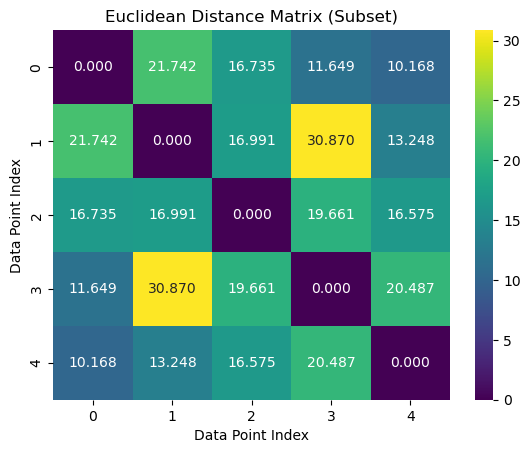

In [98]:
# Take a 5x5 sample for visualization
subset_size = 5
distance_matrix_subset = distance_matrix_batched[:subset_size, :subset_size]

# Create a heatmap
sns.heatmap(distance_matrix_subset, cmap='viridis', annot=True, fmt=".3f")
plt.title('Euclidean Distance Matrix (Subset)')
plt.xlabel('Data Point Index')
plt.ylabel('Data Point Index')
plt.show()

* K-NN Model Implementation without build-in libraries.

In [260]:
Label_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3866 entries, 0 to 3865
Columns: 1002 entries, 0 to Encoded_Labels
dtypes: float64(1000), int32(1), object(1)
memory usage: 29.5+ MB


### Encoding

In [157]:
# Assuming Label_data is your DataFrame
label_encoder = LabelEncoder()
Label_data['Encoded_Labels'] = label_encoder.fit_transform(Label_data['Labels'])

In [217]:
Label_data['Encoded_Labels'].value_counts()

Encoded_Labels
1     300
3     300
4     300
5     300
6     300
7     300
8     300
9     300
10    300
11    300
12    300
2     266
13    200
0     100
Name: count, dtype: int64

### Train Test - Split

In [261]:
X = Label_data.iloc[:, :1000]  # Replace YourDataFrame with your actual DataFrame
y = Label_data['Encoded_Labels']  # Use the encoded labels if you performed Label Encoding


In [262]:
y = y.astype(float)

In [263]:
#  'y' is your target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [254]:
# If X_test is a different data type, convert it to a NumPy array
X_test = np.array(X_test)

In [251]:
print("Training set - Features shape:", X_train.shape)
print("Training set - Labels shape:", y_train.shape)
print("Testing set - Features shape:", X_test.shape)
print("Testing set - Labels shape:", y_test.shape)

Training set - Features shape: (3092, 1000)
Training set - Labels shape: (3092,)
Testing set - Features shape: (774, 1000)
Testing set - Labels shape: (774,)


In [264]:
print("NaN values in X:", X.isna().sum().sum())
print("Infinite values in X:", np.isinf(X).sum().sum())


NaN values in X: 0
Infinite values in X: 0


* k-nn (without build-in)

In [283]:
class KNeighborsClassifier:
    def __init__(self, k):
        self.k = k

    def fit(self, X_train, y_train):
        self.X_train = np.array(X_train)
        self.y_train = np.array(y_train)

    def predict(self, X_test):
        X_test = np.array(X_test)
        predictions = []

        for test_point in X_test:
            # Calculate distances to all training points
            distances = np.sqrt(np.sum((self.X_train - test_point) ** 2, axis=1))

            # Get indices of k-nearest neighbors
            k_nearest_indices = np.argsort(distances)[:self.k]

            # Get labels of k-nearest neighbors
            k_nearest_labels = self.y_train[k_nearest_indices]

            # Convert k_nearest_labels to int before using np.bincount
            k_nearest_labels = k_nearest_labels.astype(int)

            # Predict the majority class
            predicted_label = np.bincount(k_nearest_labels).argmax()

            predictions.append(predicted_label)

        return predictions


In [284]:
knn_model = KNeighborsClassifier(k=3)
knn_model.fit(X_train, y_train)

# Make predictions on the test set
predictions = knn_model.predict(X_test)

accuracy = np.mean(predictions == y_test)
print("Accuracy:", accuracy)

Accuracy: 0.20671834625322996


* Apply hold-out and 10 cross validation method for training the model.

In [300]:
def custom_holdout_split(features, label, test_size=0.25, random_state=None):
    np.random.seed(random_state)

    # Convert to NumPy arrays
    features_array = features.values if isinstance(features, pd.DataFrame) else features
    label_array = label.values if isinstance(label, pd.Series) else label

    indices = np.arange(len(features_array))
    np.random.shuffle(indices)

    split_index = int(len(features_array) * (1 - test_size))

    train_indices, test_indices = indices[:split_index], indices[split_index:]
    X_train, X_test = features_array[train_indices], features_array[test_indices]
    y_train, y_test = label_array[train_indices], label_array[test_indices]

    return X_train, X_test, y_train, y_test

# Assuming X and y are your Pandas DataFrame and Series
X_train, X_test, y_train, y_test = custom_holdout_split(X, y, test_size=0.2, random_state=30)


In [301]:
# Model training
k = 5  # You can choose an appropriate value for k
knn_model = KNeighborsClassifier(n_neighbors=k)

knn_model.fit(X_train, y_train)

# Make predictions on the test set
predictions = knn_model.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions)

print("Model Evaluation:")
print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Model Evaluation:
Accuracy: 0.22093023255813954
Classification Report:
               precision    recall  f1-score   support

         0.0       0.29      0.38      0.32        16
         1.0       0.26      0.42      0.32        69
         2.0       0.27      0.34      0.30        59
         3.0       0.18      0.19      0.19        75
         4.0       0.31      0.28      0.29        58
         5.0       0.15      0.20      0.17        51
         6.0       0.24      0.27      0.26        51
         7.0       0.17      0.21      0.18        63
         8.0       0.12      0.09      0.10        57
         9.0       0.33      0.24      0.28        63
        10.0       0.07      0.06      0.07        49
        11.0       0.23      0.19      0.21        53
        12.0       0.32      0.21      0.25        68
        13.0       0.09      0.05      0.06        42

    accuracy                           0.22       774
   macro avg       0.22      0.22      0.21       774
weighted

In [309]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
def calculate_classification_metrics(y_true, y_pred):
    accuracy = np.mean(y_true == y_pred )
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    cm = confusion_matrix(y_true, y_pred)
    sensitivity = recall
    specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
    
    return accuracy, precision, recall, f1, sensitivity, specificity

accuracy, precision, recall, f1, sensitivity, specificity = calculate_classification_metrics(y_test, predictions)

print("Validation Accuracy:", accuracy)
print("Validation Precision:", precision)
print("Validation Recall:", recall)
print("Validation F1 Score:", f1)
print("Validation Sensitivity:", sensitivity)
print("Validation Specificity:", specificity)

Validation Accuracy: 0.22093023255813954
Validation Precision: 0.2190861078759804
Validation Recall: 0.22093023255813954
Validation F1 Score: 0.21508002622238678
Validation Sensitivity: 0.22093023255813954
Validation Specificity: 1.0


In [313]:
def knn_train_and_evaluate(train_X, train_y, val_X, val_y):
    knn_classifier = KNeighborsClassifier(n_neighbors=3)  # Use 'n_neighbors' instead of 'k'
    knn_classifier.fit(train_X, train_y)

    predictions = knn_classifier.predict(val_X)

    accuracy = accuracy_score(val_y, predictions)
    precision = precision_score(val_y, predictions, average='macro')  # Specify 'macro' for multiclass problems
    recall = recall_score(val_y, predictions, average='macro')
    f1 = f1_score(val_y, predictions, average='macro')

    # Modified confusion matrix handling for multiclass
    cm = confusion_matrix(val_y, predictions)
    tn = cm[0, 0]
    fp = cm[0, 1:].sum()
    fn = cm[1:, 0].sum()
    tp = cm[1:, 1:].sum()

    specificity = tn / (tn + fp)
    sensitivity = tp / (tp + fn)

    return accuracy, precision, recall, f1, specificity, sensitivity

In [ ]:
def k_fold_cross_validation(X, y, k):
    data = np.column_stack((X, y))
    np.random.shuffle(data)

    fold_size = len(data) // k
    total_metrics = []

    for i in range(k):
        start_val = i * fold_size
        end_val = (i + 1) * fold_size
        val_data = data[start_val:end_val]
        val_X, val_y = val_data[:, :-1], val_data[:, -1]

        # Convert validation labels to int type
        val_y = val_y.astype(int)

        train_data = np.concatenate([data[:start_val], data[end_val:]])
        train_X, train_y = train_data[:, :-1], train_data[:, -1]

        # Convert training labels to int type
        train_y = train_y.astype(int)

        metrics = knn_train_and_evaluate(train_X, train_y, val_X, val_y)
        total_metrics.append(metrics)

    avg_metrics = np.mean(total_metrics, axis=0)

    return tuple(avg_metrics)

* Calculate the classification measures. (Accuracy, Recall, Precision, Sensitivity,
  specificity, F1 Score)

In [314]:
# Store the results in a single variable
avg_accuracy, avg_precision, avg_recall, avg_f1, avg_specificity, avg_sensitivity = k_fold_cross_validation(X, y, k=5)

# Print or use the average metrics as needed
print("Average Accuracy:", avg_accuracy)
print("Average Precision:", avg_precision)
print("Average Recall:", avg_recall)
print("Average F1 Score:", avg_f1)
print("Average Specificity:", avg_specificity)
print("Average Sensitivity:", avg_sensitivity)


Average Accuracy: 0.21707632600258733
Average Precision: 0.22996932994279445
Average Recall: 0.23656178348549356
Average F1 Score: 0.21521340252249818
Average Specificity: 0.680428970006975
Average Sensitivity: 0.9721245329949589


* Find the optimized K value and plot cross-validation and test accuracy based on the K values. You can tune your model on multiple K iterations.

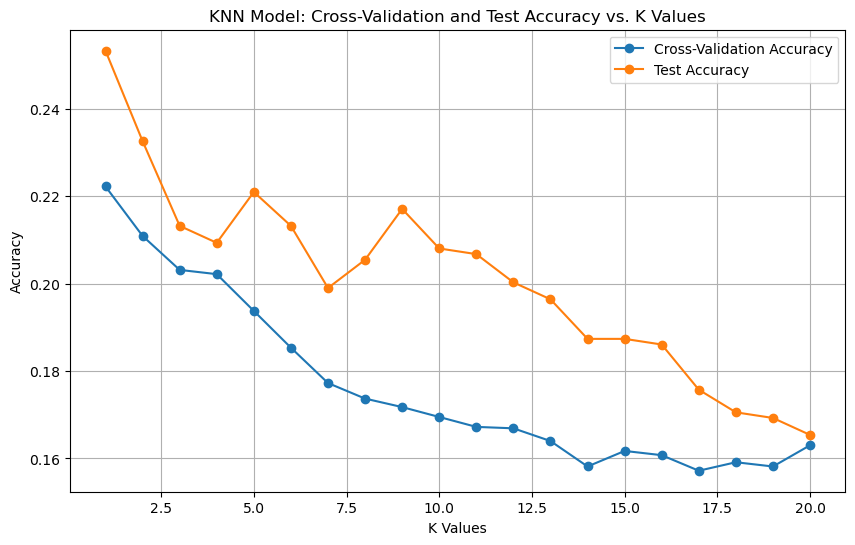

Optimal K value based on cross-validation: 1


In [315]:
# Define a range of K values to try
k_values = np.arange(1, 21)  # Adjust the range as needed

# Lists to store cross-validation and test accuracies for each K
cv_accuracies = []
test_accuracies = []

# Perform grid search over K values
for k in k_values:
    # Create a KNeighborsClassifier with the current K value
    knn_model = KNeighborsClassifier(n_neighbors=k)

    # Cross-validation on training data
    cv_accuracy = np.mean(cross_val_score(knn_model, X_train, y_train, cv=5))
    cv_accuracies.append(cv_accuracy)

    # Evaluate on the test set
    knn_model.fit(X_train, y_train)
    test_accuracy = knn_model.score(X_test, y_test)
    test_accuracies.append(test_accuracy)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(k_values, cv_accuracies, label='Cross-Validation Accuracy', marker='o')
plt.plot(k_values, test_accuracies, label='Test Accuracy', marker='o')
plt.xlabel('K Values')
plt.ylabel('Accuracy')
plt.title('KNN Model: Cross-Validation and Test Accuracy vs. K Values')
plt.legend()
plt.grid(True)
plt.show()

# Find the K value with the highest cross-validation accuracy
best_k = k_values[np.argmax(cv_accuracies)]
print(f'Optimal K value based on cross-validation: {best_k}')

In [318]:
# Cross-Validation Accuracy
cv_accuracies

[0.22218998175363752,
 0.2108735772804032,
 0.20311129235482644,
 0.20213728165796177,
 0.19372983881508438,
 0.1853218731537975,
 0.1772364864511609,
 0.17368236690350342,
 0.17173905087545943,
 0.16947629279922205,
 0.1672109206309373,
 0.16688572758023953,
 0.1639778115867016,
 0.15815622859712136,
 0.1617124394184168,
 0.16074313408723748,
 0.1571884917211705,
 0.15912762520193863,
 0.1581557057787119,
 0.16300798343711276]

In [320]:
# show Accuracies
test_accuracies

[0.2532299741602067,
 0.23255813953488372,
 0.2131782945736434,
 0.20930232558139536,
 0.22093023255813954,
 0.2131782945736434,
 0.19896640826873385,
 0.2054263565891473,
 0.21705426356589147,
 0.20801033591731266,
 0.20671834625322996,
 0.20025839793281655,
 0.19638242894056848,
 0.18733850129198967,
 0.18733850129198967,
 0.18604651162790697,
 0.17571059431524547,
 0.17054263565891473,
 0.16925064599483206,
 0.165374677002584]

# Question#2: Apply the data dimensionality reduction technique PCA on the dataset and implement all the subparts of question1.

In [326]:
Label_data.head()

,0,1,2,3,4,5,6,7,8,9,...,992,993,994,995,996,997,998,999,Labels,Encoded_Labels
0,2.3309,2.3309,2.3309,2.3309,2.3309,2.3309,2.3309,2.3309,2.3309,2.3309,...,2.7228,2.7228,2.7228,2.7228,2.7228,2.7228,2.7228,2.7228,unhealthy_0.7inner,1
1,2.7228,2.7228,2.7228,2.7228,2.7228,2.7228,2.7228,2.7228,2.7228,2.7228,...,2.9524,2.9524,2.9524,2.9524,2.9524,2.9524,2.9524,2.9524,unhealthy_0.7inner,1
2,2.9524,2.9524,2.9524,2.9524,2.9524,2.9524,2.9524,2.9524,2.9524,2.9524,...,2.1111,2.1111,2.1111,2.1111,2.1111,2.1111,2.1111,2.1111,unhealthy_0.7inner,1
3,2.1111,2.1111,2.1111,2.1111,2.1111,2.1111,2.1111,2.1111,2.1111,2.1111,...,2.1282,2.1282,2.1282,2.1282,2.1282,2.1282,2.1282,2.1282,unhealthy_0.7inner,1
4,2.1282,2.1282,2.1282,2.1282,2.1282,2.1282,2.1282,2.1282,2.1282,2.1282,...,2.9805,2.9805,2.9805,3.0024,3.0024,3.0024,3.0024,3.0024,unhealthy_0.7inner,1


In [333]:
# Assuming X and y are your feature and target arrays
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply PCA
pca = PCA(n_components=10)  # Specify the number of components you want
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Define k-NN model
knn_model = KNeighborsClassifier(n_neighbors=3)

# Fit the model and make predictions
knn_model.fit(X_train_pca, y_train)
predictions_pca = knn_model.predict(X_test_pca)

# Evaluate the model performance
accuracy_pca = accuracy_score(y_test, predictions_pca)
precision_pca = precision_score(y_test, predictions_pca, average='macro')
recall_pca = recall_score(y_test, predictions_pca, average='macro')
f1_pca = f1_score(y_test, predictions_pca, average='macro')

# Modified confusion matrix handling for multiclass
cm_pca = confusion_matrix(y_test, predictions_pca)
tn_pca = cm_pca[0, 0]
fp_pca = cm_pca[0, 1:].sum()
fn_pca = cm_pca[1:, 0].sum()
tp_pca = cm_pca[1:, 1:].sum()

specificity_pca = tn_pca / (tn_pca + fp_pca)
sensitivity_pca = tp_pca / (tp_pca + fn_pca)

print("Results without PCA:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

print("\nResults with PCA:")
print("Accuracy (PCA):", accuracy_pca)
print("Precision (PCA):", precision_pca)
print("Recall (PCA):", recall_pca)
print("F1 Score (PCA):", f1_pca)
print("Specificity (PCA):", specificity_pca)
print("Sensitivity (PCA):", sensitivity_pca)

# 10-fold cross-validation with PCA
kf = KFold(n_splits=10, random_state=42, shuffle=True)
total_metrics_pca = []

for train_index, val_index in kf.split(X_train):  # Use X_train here
    X_train_cv, X_val_cv = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_cv, y_val_cv = y_train.iloc[train_index], y_train.iloc[val_index]

    # Apply PCA
    X_train_cv_pca = pca.fit_transform(X_train_cv)
    X_val_cv_pca = pca.transform(X_val_cv)

    # Train and evaluate k-NN model
    metrics_cv = knn_train_and_evaluate(X_train_cv_pca, y_train_cv, X_val_cv_pca, y_val_cv)
    total_metrics_pca.append(metrics_cv)

# Calculate average metrics over 10 folds
avg_metrics_pca = np.mean(total_metrics_pca, axis=0)

print("\nAverage Metrics with PCA (10-fold cross-validation):")
print("Average Accuracy:", avg_metrics_pca[0])
print("Average Precision:", avg_metrics_pca[1])
print("Average Recall:", avg_metrics_pca[2])
print("Average F1 Score:", avg_metrics_pca[3])
print("Average Specificity:", avg_metrics_pca[4])
print("Average Sensitivity:", avg_metrics_pca[5])

Results without PCA:
Accuracy: 0.22093023255813954
Precision: 0.2190861078759804
Recall: 0.22093023255813954
F1 Score: 0.21508002622238678

Results with PCA:
Accuracy (PCA): 0.19767441860465115
Precision (PCA): 0.2191027806659553
Recall (PCA): 0.20736202854817515
F1 Score (PCA): 0.20135993730762913
Specificity (PCA): 0.5238095238095238
Sensitivity (PCA): 0.9800796812749004

Average Metrics with PCA (10-fold cross-validation):
Average Accuracy: 0.20893099488464348
Average Precision: 0.2411351522035367
Average Recall: 0.23085108063546073
Average F1 Score: 0.21078503074634175
Average Specificity: 0.6297727272727272
Average Sensitivity: 0.9757702787229384


# Question#3: Which model gives the best accuracy and why?

Based on the provided results:

Results without PCA (Holdout Method):

Accuracy: 0.2209
Precision: 0.2191
Recall: 0.2209
F1 Score: 0.2151
Results with PCA (Holdout Method):

Accuracy: 0.1977
Precision: 0.2191
Recall: 0.2074
F1 Score: 0.2014
Specificity: 0.5238
Sensitivity: 0.9801
Average Metrics with PCA (10-Fold Cross-Validation):

Average Accuracy: 0.2089
Average Precision: 0.2411
Average Recall: 0.2309
Average F1 Score: 0.2108
Average Specificity: 0.6298
Average Sensitivity: 0.9758
Based on these results, it seems that the model without PCA performed slightly better in terms of accuracy in both the holdout method and the 10-fold cross-validation. However, the choice of the best model may depend on the specific requirements of your application and the importance of different metrics. The model with PCA might offer advantages in terms of dimensionality reduction and feature interpretability.

Consider the trade-offs between model complexity, interpretability, and performance to make a decision based on the specific needs of your task.